# **Lab 3: Image Processing Techniques - Practice & Lab Tasks**

## **Objective**
To implement advanced image processing techniques, including:
- **Median filtering** for noise removal.
- **Bilateral filtering** for edge-aware smoothing.
- **Morphological operations** for image enhancement.

## **1. Import Required Libraries**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **2. Load and Display Image**

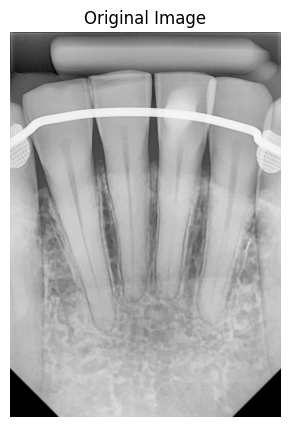

In [3]:
# Provide the full path to your image
image_path = "/content/#35 R.webp"

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Function to display an image using Matplotlib
def show_image(title, image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the original image
show_image("Original Image", image)


## **3. Apply Median Filtering**
### **Purpose:**
Removes **salt-and-pepper noise** while preserving edges.

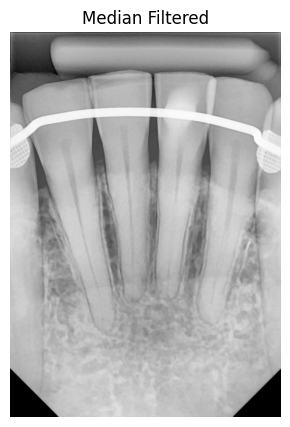

In [4]:
# Apply median filtering with a 5x5 kernel
median_filtered = cv2.medianBlur(image, 5)

# Display result
show_image("Median Filtered", median_filtered)

## **4. Apply Bilateral Filtering**
### **Purpose:**
Preserves **edges** while smoothing noise.


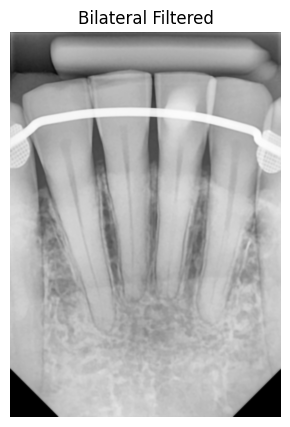

In [5]:
# Apply bilateral filtering
bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)

# Display result
show_image("Bilateral Filtered", bilateral_filtered)

## **5. Apply Morphological Operations**
### **Purpose:**
Used for **image enhancement**, particularly in **binary images**.


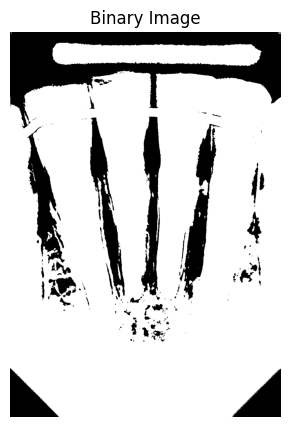

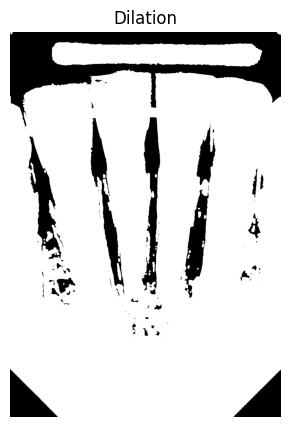

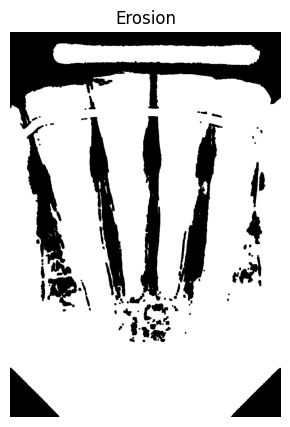

In [6]:
# Convert to binary image using thresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel
kernel = np.ones((5,5), np.uint8)

# Apply dilation (expands white regions)
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# Apply erosion (shrinks white regions)
erosion = cv2.erode(binary_image, kernel, iterations=1)

# Display results
show_image("Binary Image", binary_image)
show_image("Dilation", dilation)
show_image("Erosion", erosion)


## **6. Experiment with Different Kernel Sizes**
### **Task 1: Compare Median and Bilateral Filtering with Different Kernels**

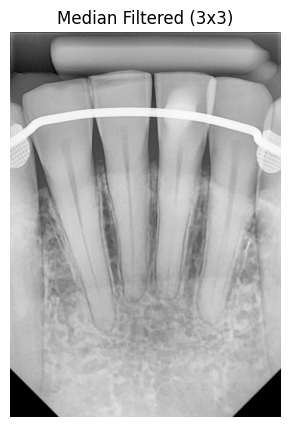

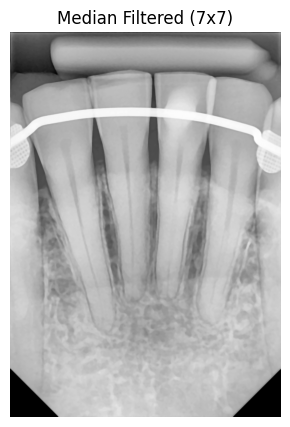

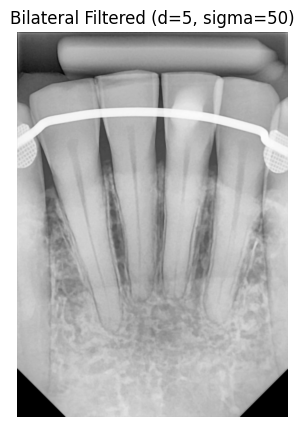

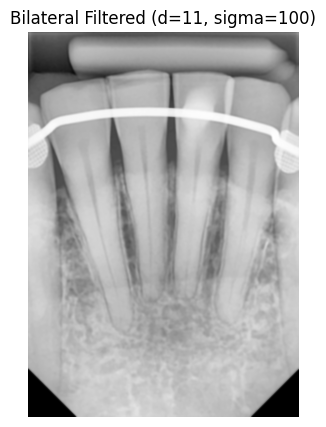

In [7]:
# Median filtering with different kernel sizes
median_filtered_3 = cv2.medianBlur(image, 3)
median_filtered_7 = cv2.medianBlur(image, 7)

# Display results
show_image("Median Filtered (3x3)", median_filtered_3)
show_image("Median Filtered (7x7)", median_filtered_7)

# Bilateral filtering with different parameters
bilateral_filtered_5 = cv2.bilateralFilter(image, 5, 50, 50)
bilateral_filtered_11 = cv2.bilateralFilter(image, 11, 100, 100)

# Display results
show_image("Bilateral Filtered (d=5, sigma=50)", bilateral_filtered_5)
show_image("Bilateral Filtered (d=11, sigma=100)", bilateral_filtered_11)

## **7. Apply Opening and Closing Operations**
### **Task 2: Perform Opening and Closing**

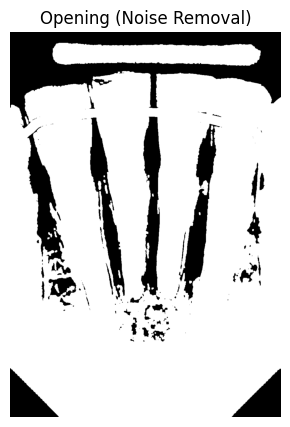

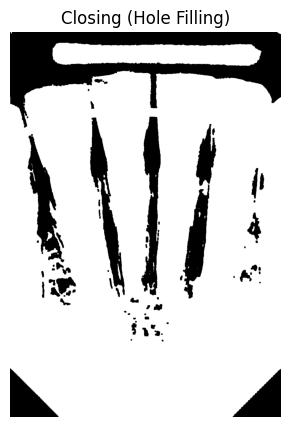

In [8]:
# Apply opening (erosion followed by dilation) - removes small noise
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply closing (dilation followed by erosion) - fills small holes
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Display results
show_image("Opening (Noise Removal)", opening)
show_image("Closing (Hole Filling)", closing)

## **8. Create a Noisy Image and Compare Filters**
### **Task 3: Test Median and Bilateral Filters on a Noisy Image**

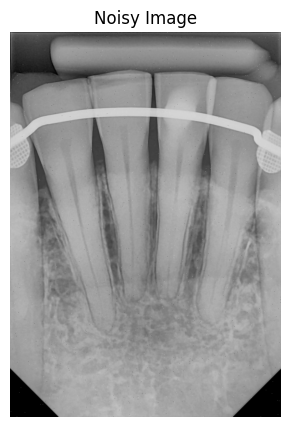

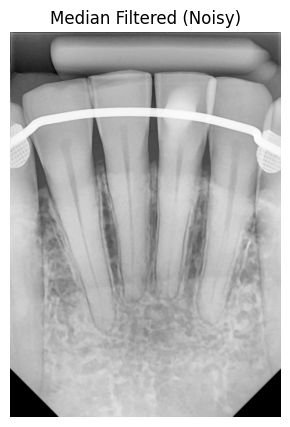

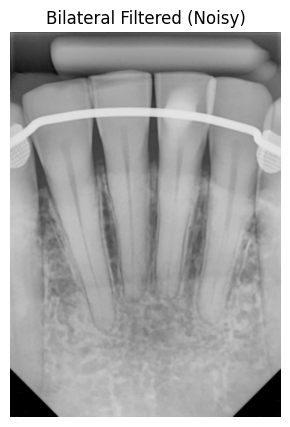

In [9]:
# Create a noisy image (add salt-and-pepper noise)
noisy_image = image.copy()
num_noise_pixels = 500  # Adjust noise level

# Randomly add white and black noise
coords = [np.random.randint(0, noisy_image.shape[0], num_noise_pixels),
          np.random.randint(0, noisy_image.shape[1], num_noise_pixels)]
noisy_image[coords[0], coords[1]] = 255  # Salt noise

coords = [np.random.randint(0, noisy_image.shape[0], num_noise_pixels),
          np.random.randint(0, noisy_image.shape[1], num_noise_pixels)]
noisy_image[coords[0], coords[1]] = 0  # Pepper noise

# Apply median filtering
median_filtered_noise = cv2.medianBlur(noisy_image, 5)

# Apply bilateral filtering
bilateral_filtered_noise = cv2.bilateralFilter(noisy_image, 9, 75, 75)

# Display results
show_image("Noisy Image", noisy_image)
show_image("Median Filtered (Noisy)", median_filtered_noise)
show_image("Bilateral Filtered (Noisy)", bilateral_filtered_noise)
